In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Model Prediction of IT Students.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Model Prediction of IT Students.csv'

In [ ]:
df.head(5)

,Timestamp,Username,Name,Age,Sex,Strand in SHS,Prefer Skill,Major in College,Unnamed: 8
0,2023/05/05 7:13:39 PM GMT+8,hernandezkleyrann@gmail.com,Claire Ann Hernandez,21,NaN,ICT,NaN,Business Analytics Major,NaN
1,2023/05/05 7:13:56 PM GMT+8,20-73559@g.batstate-u.edu.ph,Paolo D. Julongbayan,21,NaN,ICT,NaN,Business Analytics Major,NaN
2,2023/05/05 7:16:37 PM GMT+8,hernandezkleyrann@gmail.com,Claire Ann Hernandez,21,Female,ICT,NaN,Business Analytics Major,NaN
3,2023/05/05 7:16:43 PM GMT+8,charlessebastiengualvez123@gmail.com,Charles Sebastien Gualvez,21,Male,ICT (Animation / Programming),NaN,Business Analytics Major,NaN
4,2023/05/05 7:17:43 PM GMT+8,jephthahlandicho1212@gmail.com,Jephthah Jehosaphat Landicho,21,Male,STEM,NaN,Business Analytics Major,NaN


In [ ]:
df['Major in College'].value_counts()

Business Analytics Major    29
Networking                  24
Name: Major in College, dtype: int64

In [ ]:
df.shape

(53, 9)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(53, 9)

In [ ]:
df.isna().sum()

Timestamp            0
Username            13
Name                 0
Age                  0
Sex                  2
Strand in SHS        0
Prefer Skill        10
Major in College     0
Unnamed: 8          47
dtype: int64

In [ ]:
df.drop(['Unnamed: 8'],inplace=True,axis=1)

In [ ]:
df['Username'].fillna('NA',inplace=True);
df['Prefer Skill'].fillna('NA',inplace=True);
df['Sex'].fillna('NA',inplace=True);

In [ ]:
df.isna().sum()

Timestamp           0
Username            0
Name                0
Age                 0
Sex                 0
Strand in SHS       0
Prefer Skill        0
Major in College    0
dtype: int64

In [ ]:
df.dtypes

Timestamp           object
Username            object
Name                object
Age                  int64
Sex                 object
Strand in SHS       object
Prefer Skill        object
Major in College    object
dtype: object

In [ ]:
#remove outliers

def removeOutliers(col):
    q3=df[col].quantile(0.75);
    q1=df[col].quantile(0.25);
    IQR=q3-q1
    
    _max = q3 + (IQR * 1.5);
    _min = q1 - (IQR * 1.5);
    df.loc[df[col] < _min,col] = _min;
    df.loc[df[col] > _max,col] = _max;

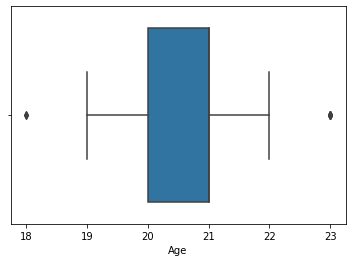

In [ ]:
for col in df.columns:
    if(col != 'Major in College' and  df[col].dtypes == 'int64'):
        plt.figure();
        sns.boxplot(df[col]);

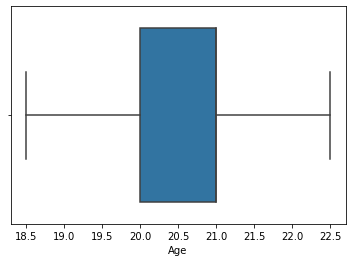

In [ ]:
for col in df.columns:
    if(col != 'Major in College' and  df[col].dtypes == 'int64'):
        removeOutliers(col);
        plt.figure();
        sns.boxplot(df[col]);

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.columns

Index(['Timestamp', 'Username', 'Name', 'Age', 'Sex', 'Strand in SHS',
       'Prefer Skill', 'Major in College'],
      dtype='object')

In [ ]:
encoder= LabelEncoder();
df_new=df.copy();
df_new

,Timestamp,Username,Name,Age,Sex,Strand in SHS,Prefer Skill,Major in College
0,2023/05/05 7:13:39 PM GMT+8,hernandezkleyrann@gmail.com,Claire Ann Hernandez,21.0,NA,ICT,NA,Business Analytics Major
1,2023/05/05 7:13:56 PM GMT+8,20-73559@g.batstate-u.edu.ph,Paolo D. Julongbayan,21.0,NA,ICT,NA,Business Analytics Major
2,2023/05/05 7:16:37 PM GMT+8,hernandezkleyrann@gmail.com,Claire Ann Hernandez,21.0,Female,ICT,NA,Business Analytics Major
3,2023/05/05 7:16:43 PM GMT+8,charlessebastiengualvez123@gmail.com,Charles Sebastien Gualvez,21.0,Male,ICT (Animation / Programming),NA,Business Analytics Major
4,2023/05/05 7:17:43 PM GMT+8,jephthahlandicho1212@gmail.com,Jephthah Jehosaphat Landicho,21.0,Male,STEM,NA,Business Analytics Major
5,2023/05/05 7:18:24 PM GMT+8,20-73559@g.batstate-u.edu.ph,Paolo D. Julongbayan,21.0,Male,ICT,NA,Business Analytics Major
6,2023/05/05 7:21:00 PM GMT+8,leirah.ningala@gmail.com,Leirah,22.5,Female,ICT,NA,Networking
7,2023/05/05 7:23:35 PM GMT+8,20-75518@g.batstate-u.edu.ph,Bryan Russel I. Rosel,20.0,Male,ICT,NA,Business Analytics Major
8,2023/05/05 7:23:35 PM GMT+8,jhonrelremobatacwalog@gmail.com,Jhon Rel R. Walog,22.5,Male,CSS,NA,Networking
9,2023/05/05 7:26:40 PM GMT+8,geraldgarciacapoon@gmail.com,Gerald G Capoon,20.0,Male,ICT,NA,Networking


In [ ]:
# for col in df_new.columns:
#     if(col != 'Major in College'):
#         df_new[col] = encoder.fit_transform(df_new[col]);

In [ ]:
for col in df_new.columns:
#     if (col!='Attrition'):
        df_new[col]=encoder.fit_transform(df_new[col]);
        
df_new

,Timestamp,Username,Name,Age,Sex,Strand in SHS,Prefer Skill,Major in College
0,2,24,10,3,2,1,1,0
1,3,3,41,3,2,1,1,0
2,4,24,10,3,0,1,1,0
3,5,18,9,3,1,2,1,0
4,6,26,22,3,1,4,1,0
5,7,3,41,3,1,1,1,0
6,8,32,33,5,0,1,1,1
7,9,7,6,2,1,1,1,0
8,9,27,25,5,1,0,1,1
9,10,23,19,2,1,1,1,1


In [ ]:
df_new.dtypes

Timestamp           int32
Username            int32
Name                int32
Age                 int64
Sex                 int32
Strand in SHS       int32
Prefer Skill        int32
Major in College    int32
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_new.copy();
scaler = MinMaxScaler();

In [ ]:
for col in df_scaled.columns:
    if(col != 'Major in College'):
        df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1,1));

In [ ]:
df_scaled

,Timestamp,Username,Name,Age,Sex,Strand in SHS,Prefer Skill,Major in College
0,0.039216,0.631579,0.204082,0.6,1.0,0.25,0.5,0
1,0.058824,0.078947,0.836735,0.6,1.0,0.25,0.5,0
2,0.078431,0.631579,0.204082,0.6,0.0,0.25,0.5,0
3,0.098039,0.473684,0.183673,0.6,0.5,0.50,0.5,0
4,0.117647,0.684211,0.448980,0.6,0.5,1.00,0.5,0
5,0.137255,0.078947,0.836735,0.6,0.5,0.25,0.5,0
6,0.156863,0.842105,0.673469,1.0,0.0,0.25,0.5,1
7,0.176471,0.184211,0.122449,0.4,0.5,0.25,0.5,0
8,0.176471,0.710526,0.510204,1.0,0.5,0.00,0.5,1
9,0.196078,0.605263,0.387755,0.4,0.5,0.25,0.5,1


<AxesSubplot:>

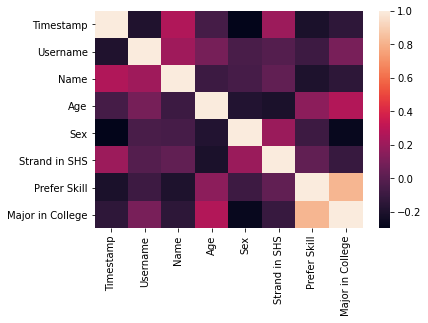

In [ ]:
sns.heatmap(df_scaled.corr())

In [ ]:
corr = df_scaled.corr();
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False);
corr_df = pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()

In [ ]:
corr_df

,,0
Prefer Skill,Major in College,0.818799


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_scaled.drop(['Major in College'],axis=1);
y = df_scaled['Major in College'];

In [ ]:

from sklearn.metrics import confusion_matrix;
from sklearn.metrics import RocCurveDisplay;
from sklearn.metrics import classification_report;

def evaluate_model(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=45, train_size = .80, stratify = y);
    model.fit(X_train, y_train);
    print(classification_report(y_test,model.predict(X_test),target_names = ['Business Analytics Major','Networking']));
    print(confusion_matrix(y_test, model.predict(X_test),labels = [0,1]));
    print('Training Score: ', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test));
    RocCurveDisplay.from_estimator(model,X_test,y_test)

                          precision    recall  f1-score   support

Business Analytics Major       1.00      0.83      0.91         6
              Networking       0.83      1.00      0.91         5

                accuracy                           0.91        11
               macro avg       0.92      0.92      0.91        11
            weighted avg       0.92      0.91      0.91        11

[[5 1]
 [0 5]]
Training Score:  1.0
Test Score: 0.9090909090909091


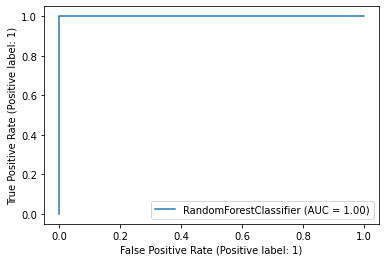

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier();
evaluate_model(rf,X,y)

                          precision    recall  f1-score   support

Business Analytics Major       1.00      0.83      0.91         6
              Networking       0.83      1.00      0.91         5

                accuracy                           0.91        11
               macro avg       0.92      0.92      0.91        11
            weighted avg       0.92      0.91      0.91        11

[[5 1]
 [0 5]]
Training Score:  1.0
Test Score: 0.9090909090909091


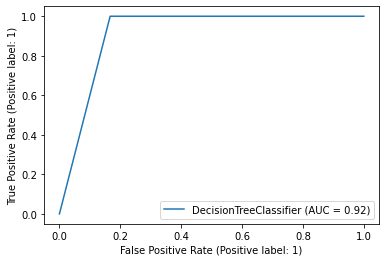

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
evaluate_model(dt,X,y)

                          precision    recall  f1-score   support

Business Analytics Major       1.00      0.83      0.91         6
              Networking       0.83      1.00      0.91         5

                accuracy                           0.91        11
               macro avg       0.92      0.92      0.91        11
            weighted avg       0.92      0.91      0.91        11

[[5 1]
 [0 5]]
Training Score:  0.9285714285714286
Test Score: 0.9090909090909091


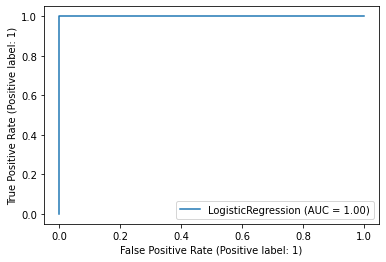

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
evaluate_model(lr,X,y)

In [3]:
import pickle
dbfile = open('prediction_model.sav', 'rb');
model = pickle.load(dbfile);